# Wk18-Lecture01-CodeAlong: Preparing Time Series Data

## Learning Objectives

- By the end of this CodeAlong, students will be able to:
    - Create date time indices
    - Resample at various frequencies
    - Impute null values for time series 
    - Convert wide-form data to long-form
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])

# Datetime Objects

In Python, we will deal with 2 types of date/time objects:
- Python datetime
- Panda's datetime indices

In [3]:
import datetime as dt

In [4]:
# Get Today's date (ONLY) from python's datetime.date module
today_date = dt.date.today()
today_date

datetime.date(2023, 8, 28)

In [5]:
# Printed dt objects look very different!
print(today_date)

2023-08-28


In [6]:
# Get Today's date(&time) from python's datetime.datetime module
today_datetime = dt.datetime.today()
today_datetime

datetime.datetime(2023, 8, 28, 20, 20, 32, 243562)

In [7]:
print(today_datetime)

2023-08-28 20:20:32.243562


### Datetime Formats

- Datetime objects have a `.strftime()` method (string-format-time)

- 📖 **strftime cheat sheet: https://strftime.org/**
- 📖 **Official Table of Python datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes **


| Directive   | Meaning                                                                                                                                                                          | Example                                                                      |
|:------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------|
| %a          | Weekday as locale’s abbreviated name.                                                                                                                                            | Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)                              |
| %A          | Weekday as locale’s full name.                                                                                                                                                   | Sunday, Monday, …, Saturday (en_US); Sonntag, Montag, …, Samstag (de_DE)     |
| %w          | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 0, 1, …, 6                                                                   |
| %d          | Day of the month as a zero-padded decimal number.                                                                                                                                | 01, 02, …, 31                                                                |
| %b          | Month as locale’s abbreviated name.                                                                                                                                              | Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de_DE)                           |
| %B          | Month as locale’s full name.                                                                                                                                                     | January, February, …, December (en_US); Januar, Februar, …, Dezember (de_DE) |
| %m          | Month as a zero-padded decimal number.                                                                                                                                           | 01, 02, …, 12                                                                |
| %y          | Year without century as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 99                                                                |
| %Y          | Year with century as a decimal number.                                                                                                                                           | 0001, 0002, …, 2013, 2014, …, 9998, 9999                                     |
| %H          | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 23                                                                |
| %I          | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 01, 02, …, 12                                                                |
| %p          | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM, PM (en_US); am, pm (de_DE)                                               |
| %M          | Minute as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %S          | Second as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %f          | Microsecond as a decimal number, zero-padded to 6 digits.                                                                                                                        | 000000, 000001, …, 999999                                                    |
| %z          | UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).                                                                                                 | (empty), +0000, -0400, +1030, +063415, -030712.345216                        |
| %Z          | Time zone name (empty string if the object is naive).                                                                                                                            | (empty), UTC, GMT                                                            |
| %j          | Day of the year as a zero-padded decimal number.                                                                                                                                 | 001, 002, …, 366                                                             |
| %U          | Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %W          | Week number of the year (Monday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Monday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %c          | Locale’s appropriate date and time representation.                                                                                                                               | Tue Aug 16 21:30:00 1988 (en_US); Di 16 Aug 21:30:00 1988 (de_DE)            |
| %x          | Locale’s appropriate date representation.                                                                                                                                        | 08/16/88 (None); 08/16/1988 (en_US); 16.08.1988 (de_DE)                      |
| %X          | Locale’s appropriate time representation.                                                                                                                                        | 21:30:00 (en_US); 21:30:00 (de_DE)                                           |
| %%          | A literal '%' character.                                                                                                                                                         | %                                                                            |

In [8]:
## How to make a markdown table from a csv
freq_codes = pd.read_csv('Reference-Python-Frequency-Codes.csv', index_col=0)
freq_codes

,Meaning,Example,Notes
Directive,,,
%a,Weekday as locale’s abbreviated name.,"Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)",(1)
%A,Weekday as locale’s full name.,"Sunday, Monday, …, Saturday (en_US); Sonntag, ...",(1)
%w,"Weekday as a decimal number, where 0 is Sunday...","0, 1, …, 6",NaN
%d,Day of the month as a zero-padded decimal number.,"01, 02, …, 31",(9)
%b,Month as locale’s abbreviated name.,"Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de...",(1)
%B,Month as locale’s full name.,"January, February, …, December (en_US); Januar...",(1)
%m,Month as a zero-padded decimal number.,"01, 02, …, 12",(9)
%y,Year without century as a zero-padded decimal ...,"00, 01, …, 99",(9)
%Y,Year with century as a decimal number.,"0001, 0002, …, 2013, 2014, …, 9998, 9999",(2)


In [9]:
# print(freq_codes.drop(columns=["Notes"]).to_markdown())

In [10]:
today_datetime

datetime.datetime(2023, 8, 28, 20, 20, 32, 243562)

In [11]:
## Month/Day/Year 24Hour Time
mo_day_yr_24hr_time_fmt = "%m/%d/%Y %T"
today_dt_24hr_str = today_datetime.strftime(mo_day_yr_24hr_time_fmt)
today_dt_24hr_str

'08/28/2023 20:20:32'

In [12]:
## Monday/Day/Year 12 Hour Time (+AM/PM)
mo_day_yr_12hr_time_fmt =  "%m/%d/%Y %I:%M:%S %p"

today_dt_12hr_str = today_datetime.strftime(mo_day_yr_12hr_time_fmt)
today_dt_12hr_str

'08/28/2023 08:20:32 PM'

> `.strftime` returns a STRING

In [13]:
type(today_dt_24hr_str)

str

In [14]:
## But pd.to_datetime can do that for us! 
converted_date_pandas = pd.to_datetime(today_dt_24hr_str)
converted_date_pandas

Timestamp('2023-08-28 20:20:32')

> We will use pandas datetime objects/functions whenever possible, as they save us a lot of time!

### Comparing Python vs. Pandas Datetime Objects

In [15]:
## Python Datetime 
print(type(today_datetime))

## Displaying vs printing
display(today_datetime)
print(today_datetime)

<class 'datetime.datetime'>


datetime.datetime(2023, 8, 28, 20, 20, 32, 243562)

2023-08-28 20:20:32.243562


In [16]:
## Panda's Timestamp
print(type(converted_date_pandas))

## Displaying vs printing
display(converted_date_pandas)
print(converted_date_pandas)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2023-08-28 20:20:32')

2023-08-28 20:20:32


# Working with Time Series - Data with Regular Intervals

### Stock Data (S&P500)

- S&P 500 (Kibot) 
     - IVE S&P 500 1-min aggregate data from: http://www.kibot.com/free_historical_data.aspx

In [17]:
sp500_min_df = pd.read_csv('Data/stocks/sp500_ive_min_tick_bidask.csv')
sp500_min_df.head()

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52


In [18]:
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      445762 non-null  object 
 1   Time      445762 non-null  object 
 2   BidOpen   445762 non-null  float64
 3   BidHigh   445762 non-null  float64
 4   BidLow    445762 non-null  float64
 5   BidClose  445762 non-null  float64
 6   AskOpen   445762 non-null  float64
 7   AskHigh   445762 non-null  float64
 8   AskLow    445762 non-null  float64
 9   AskClose  445762 non-null  float64
dtypes: float64(8), object(2)
memory usage: 34.0+ MB


## Using pd.to_datetime

- Powerful  (but slow) function for converting data to datetime.

In [19]:

sp500_min_df['Date']+' ' + sp500_min_df['Time']

0         01/02/2018 09:29
1         01/02/2018 09:30
2         01/02/2018 09:31
3         01/02/2018 09:32
4         01/02/2018 09:33
                ...       
445757    01/27/2023 15:56
445758    01/27/2023 15:57
445759    01/27/2023 15:58
445760    01/27/2023 15:59
445761    01/27/2023 16:00
Length: 445762, dtype: object

In [20]:
%%time
## Make a datetime index using pd.to_datetime
sp500_min_df['Datetime'] = pd.to_datetime(sp500_min_df['Date']+' ' + sp500_min_df['Time'])
sp500_min_df

CPU times: user 12.4 s, sys: 66.9 ms, total: 12.5 s
Wall time: 12.5 s


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,Datetime
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,2018-01-02 09:29:00
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,2018-01-02 09:30:00
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,2018-01-02 09:31:00
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,2018-01-02 09:32:00
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,2018-01-02 09:33:00
...,...,...,...,...,...,...,...,...,...,...,...
445757,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49,2023-01-27 15:56:00
445758,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45,2023-01-27 15:57:00
445759,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47,2023-01-27 15:58:00
445760,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50,2023-01-27 15:59:00


- We can speed up the conversion by specifying the correct time format and setting `infer_datetime_format=False`

In [21]:
## Creating/testing our time format
fmt = "%m/%d/%Y %H:%M"
today_datetime.strftime(fmt)

'08/28/2023 20:20'

In [22]:
True

True

In [23]:
# print

In [24]:
%%time
## Make a datetime index using pd.to_datetime & specifying the format  (to save gtime)
sp500_min_df['Datetime'] = pd.to_datetime(sp500_min_df['Date']+' ' + sp500_min_df['Time'],
                                          format=fmt,
                                         infer_datetime_format=False)
sp500_min_df

CPU times: user 589 ms, sys: 15.1 ms, total: 604 ms
Wall time: 604 ms


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,Datetime
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67,2018-01-02 09:29:00
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53,2018-01-02 09:30:00
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55,2018-01-02 09:31:00
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59,2018-01-02 09:32:00
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52,2018-01-02 09:33:00
...,...,...,...,...,...,...,...,...,...,...,...
445757,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49,2023-01-27 15:56:00
445758,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45,2023-01-27 15:57:00
445759,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47,2023-01-27 15:58:00
445760,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50,2023-01-27 15:59:00


In [25]:
sp500_min_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445762 entries, 0 to 445761
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      445762 non-null  object        
 1   Time      445762 non-null  object        
 2   BidOpen   445762 non-null  float64       
 3   BidHigh   445762 non-null  float64       
 4   BidLow    445762 non-null  float64       
 5   BidClose  445762 non-null  float64       
 6   AskOpen   445762 non-null  float64       
 7   AskHigh   445762 non-null  float64       
 8   AskLow    445762 non-null  float64       
 9   AskClose  445762 non-null  float64       
 10  Datetime  445762 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 37.4+ MB


In [26]:
## Setting the datetime index
df_ts = sp500_min_df.set_index("Datetime")
df_ts

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
Datetime,,,,,,,,,,
2018-01-02 09:29:00,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
2018-01-02 09:30:00,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2018-01-02 09:31:00,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
2018-01-02 09:32:00,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
2018-01-02 09:33:00,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 15:56:00,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
2023-01-27 15:57:00,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
2023-01-27 15:58:00,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47


In [27]:
df_ts.index

DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=445762, freq=None)

In [28]:
## Only keeping Closing Ask/Bid
close_cols = [c for c in df_ts.columns if "Close" in c]
df_ts = df_ts[close_cols]
df_ts

,BidClose,AskClose
Datetime,,
2018-01-02 09:29:00,102.33,102.67
2018-01-02 09:30:00,102.52,102.53
2018-01-02 09:31:00,102.53,102.55
2018-01-02 09:32:00,102.58,102.59
2018-01-02 09:33:00,102.51,102.52
...,...,...
2023-01-27 15:56:00,154.48,154.49
2023-01-27 15:57:00,154.44,154.45
2023-01-27 15:58:00,154.46,154.47


In [29]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['2018-01-02 09:29:00', '2018-01-02 09:30:00',
               '2018-01-02 09:31:00', '2018-01-02 09:32:00',
               '2018-01-02 09:33:00', '2018-01-02 09:34:00',
               '2018-01-02 09:35:00', '2018-01-02 09:36:00',
               '2018-01-02 09:37:00', '2018-01-02 09:38:00',
               ...
               '2023-01-27 15:51:00', '2023-01-27 15:52:00',
               '2023-01-27 15:53:00', '2023-01-27 15:54:00',
               '2023-01-27 15:55:00', '2023-01-27 15:56:00',
               '2023-01-27 15:57:00', '2023-01-27 15:58:00',
               '2023-01-27 15:59:00', '2023-01-27 16:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=445762, freq=None)

## 📈 Visualizing Our Time Series DataFrame

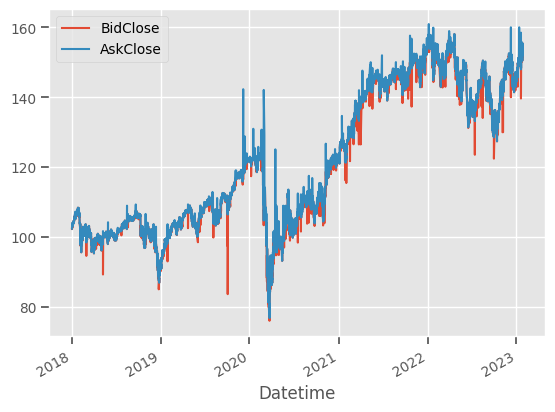

In [30]:
## let's visualize our dataframe 
ax = df_ts.plot()

> Time series visualizations usually require wider figures. 

### Changing Default Figure Size

In [31]:
#plt.rcParams

In [32]:
# check default figsize in rcParams
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [33]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,5)

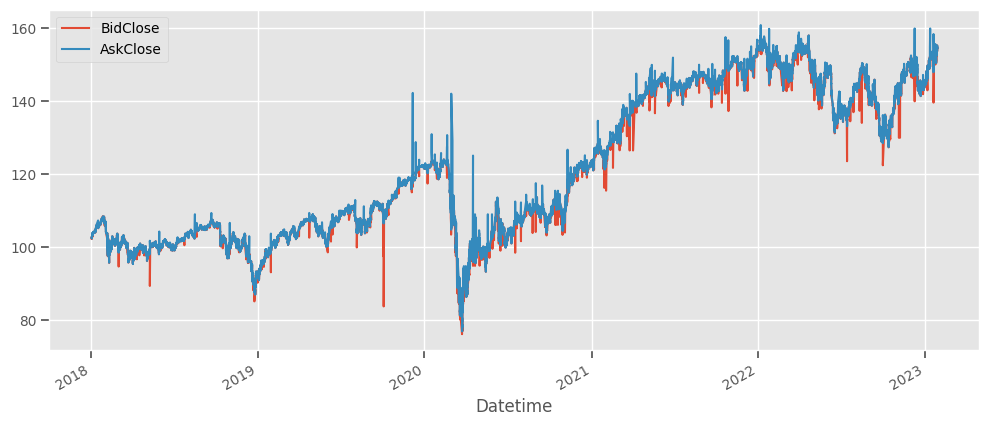

In [34]:
## recreate the plot
ax = df_ts.plot()

### Using Tick Date Formatters/Locators

- Let's add a minor xtick every 3 months.

In [35]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

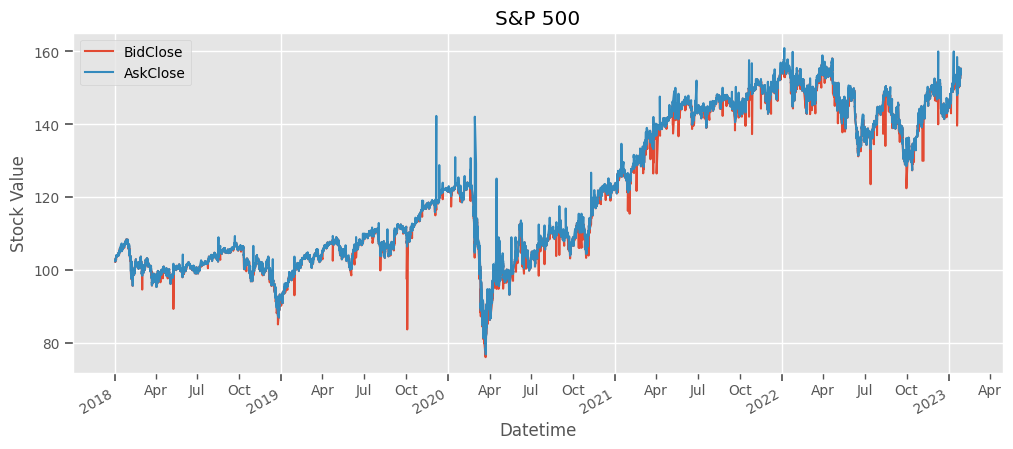

In [36]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

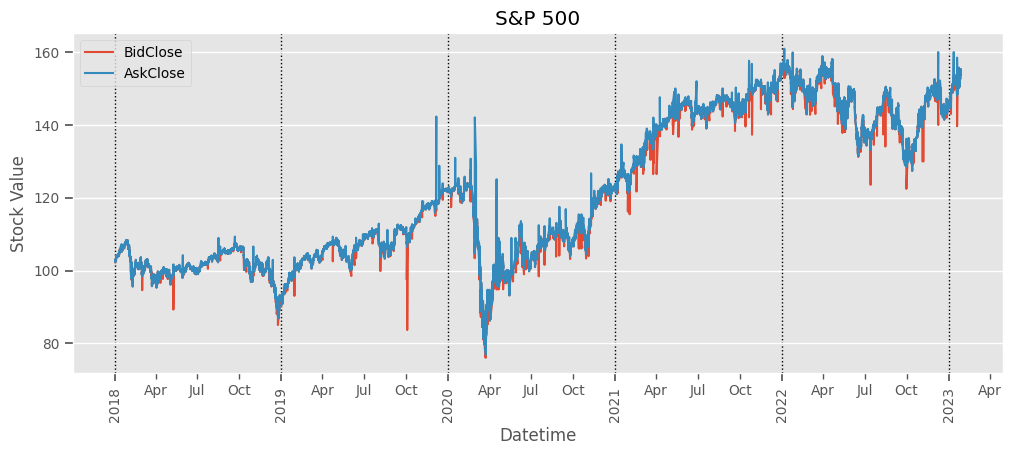

In [37]:
## Create our plot and save the ax
ax = df_ts.plot()
ax.set(ylabel="Stock Value", title='S&P 500')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)





# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

In [38]:
def format_xdates_stocks(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig


In [39]:
mticks.

SyntaxError: invalid syntax (1044999975.py, line 1)

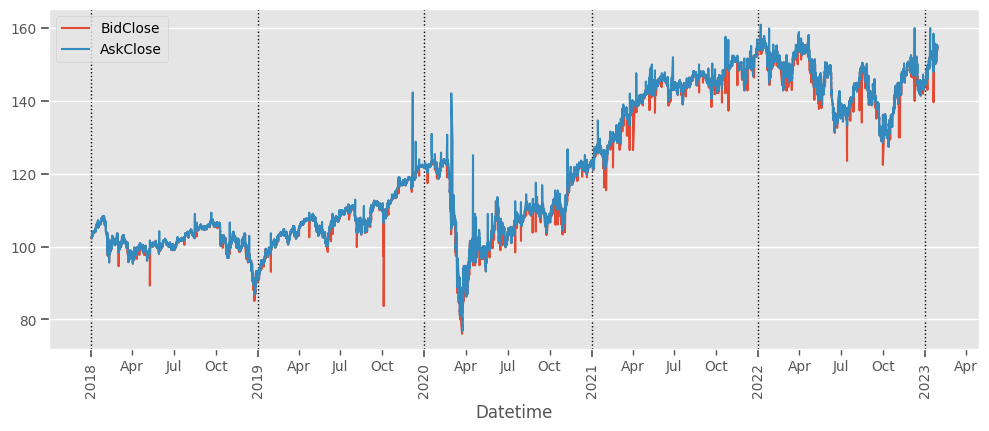

In [40]:
ax = df_ts.plot()
format_xdates_stocks(ax);

## Slicing (with a Datetime Index)

In [41]:
## Get all/any dates from 2022
df_ts.loc['2022']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-12-30 15:56:00,144.98,145.00
2022-12-30 15:57:00,144.99,145.00
2022-12-30 15:58:00,145.02,145.03


In [42]:
# Get all of january, 2022
df_ts.loc['January 2022']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-01-31 15:56:00,151.69,151.72
2022-01-31 15:57:00,151.74,151.77
2022-01-31 15:58:00,151.68,151.71


In [43]:
## Get January 01st, 2022 to March 16th 2022
df_ts.loc['01/01/22':'03/16/22']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-03-16 15:56:00,149.80,149.83
2022-03-16 15:57:00,149.76,149.78
2022-03-16 15:58:00,149.84,149.85


In [44]:
df_ts.loc['01/01/22':'March 16, 2022']

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-03-16 15:56:00,149.80,149.83
2022-03-16 15:57:00,149.76,149.78
2022-03-16 15:58:00,149.84,149.85


> Notice the earliest date is 2020-01-03

In [45]:
## Get just 01/03 - AskClose
df_ts.loc["01/03/2022", "AskClose"]

Datetime
2022-01-03 09:30:00   154.53
2022-01-03 09:31:00   154.44
2022-01-03 09:32:00   154.39
2022-01-03 09:33:00   154.55
2022-01-03 09:34:00   154.60
                       ...  
2022-01-03 15:56:00   154.86
2022-01-03 15:57:00   154.90
2022-01-03 15:58:00   154.86
2022-01-03 15:59:00   155.00
2022-01-03 16:00:00   155.02
Name: AskClose, Length: 352, dtype: float64

In [55]:
## cannot slice out more than 1 non-continuous dates
dates_to_keep = ['01/03/2022','01/05/2022']
# try: 
df_ts.loc[dates_to_keep]
# except Exception as e:
#     display(e)

KeyError: "None of [Index(['01/03/2022', '01/05/2022'], dtype='object', name='Datetime')] are in the [index]"

In [56]:
## But can use multiple .loc's in a loop or list comprehension
sliced_ts = pd.concat([df_ts.loc[i] for i in dates_to_keep])
sliced_ts

,BidClose,AskClose
Datetime,,
2022-01-03 09:30:00,154.47,154.53
2022-01-03 09:31:00,154.38,154.44
2022-01-03 09:32:00,154.39,154.39
2022-01-03 09:33:00,154.51,154.55
2022-01-03 09:34:00,154.55,154.60
...,...,...
2022-01-05 15:56:00,155.50,155.51
2022-01-05 15:57:00,155.52,155.53
2022-01-05 15:58:00,155.52,155.54


<Axes: xlabel='Datetime'>

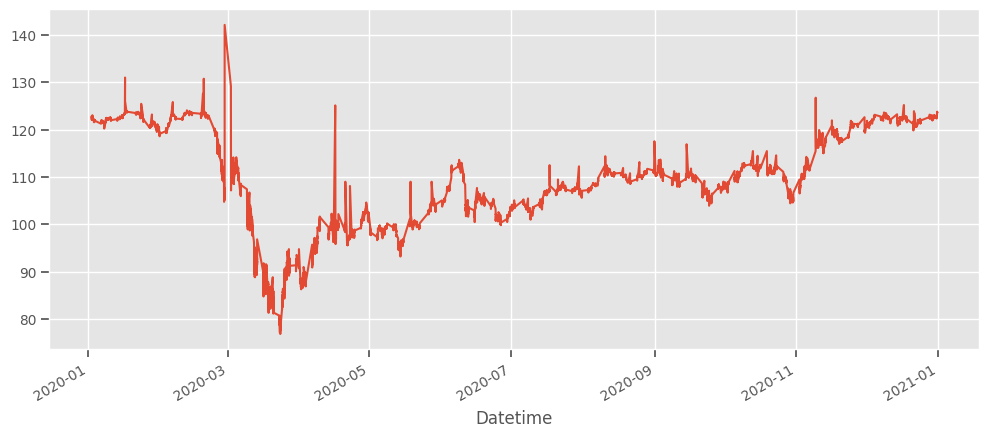

In [57]:
## saving ts to return to later
stock_ts = df_ts.loc['2020','AskClose'].copy()
stock_ts.plot()

### Using Time Deltas

> We want to slice out a ts around the date with the minumum price. We want our slice to start 5 days before and end 5 days after.

In [58]:
## save timestamp of lowest price
idx_min_price = stock_ts.idxmin()
idx_min_price

Timestamp('2020-03-23 15:35:00')

In [59]:
try:
    idx_min_price +'4 days'
except Exception as e:
    display(e)

TypeError("unsupported operand type(s) for +: 'Timestamp' and 'str'")

In [60]:
## Making a time delta with pd.to_tiemdelta
delta_days = pd.to_timedelta('4 days')
delta_days

Timedelta('4 days 00:00:00')

In [61]:
## Subtracting our delta to get start
start = idx_min_price - delta_days
start

Timestamp('2020-03-19 15:35:00')

In [62]:
## adding our time delta to get the end
end = idx_min_price + delta_days
end

Timestamp('2020-03-27 15:35:00')

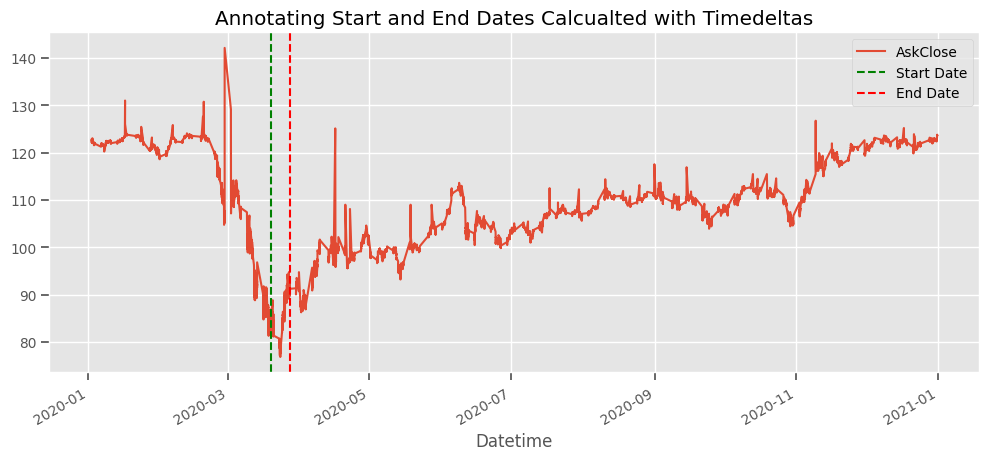

In [63]:
## Annotating the time period we've selected on our entire ts
ax = stock_ts.plot(title="Annotating Start and End Dates Calcualted with Timedeltas");
ax.axvline(start,ls='--',color='green', label='Start Date')
ax.axvline(end, ls='--',color='red',label='End Date')
ax.legend()

In [64]:
## Slicing out the timeperiod and saving as eda_ts
eda_ts = stock_ts.loc[start:end]#.resample("D").last()
eda_ts

Datetime
2020-03-19 15:35:00   85.77
2020-03-19 15:36:00   85.48
2020-03-19 15:37:00   85.63
2020-03-19 15:38:00   85.44
2020-03-19 15:39:00   85.55
                       ... 
2020-03-27 15:31:00   92.45
2020-03-27 15:32:00   92.26
2020-03-27 15:33:00   91.97
2020-03-27 15:34:00   92.03
2020-03-27 15:35:00   91.89
Name: AskClose, Length: 2360, dtype: float64

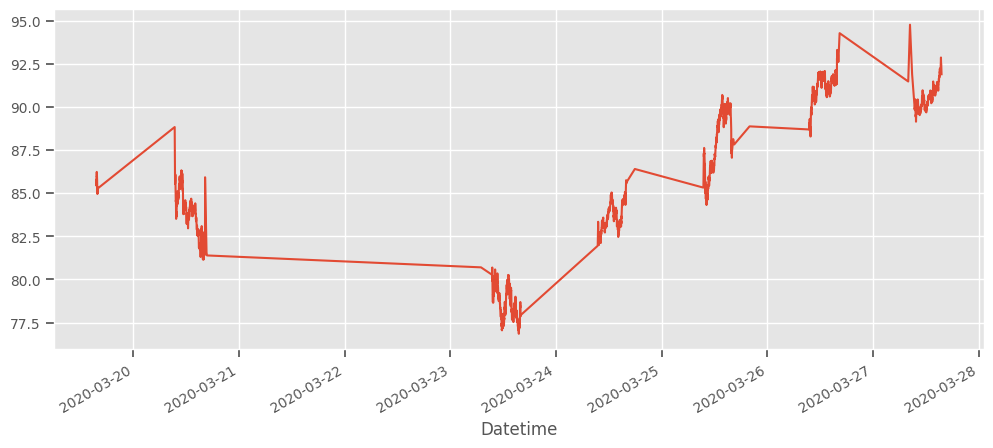

In [65]:
ax = eda_ts.plot()

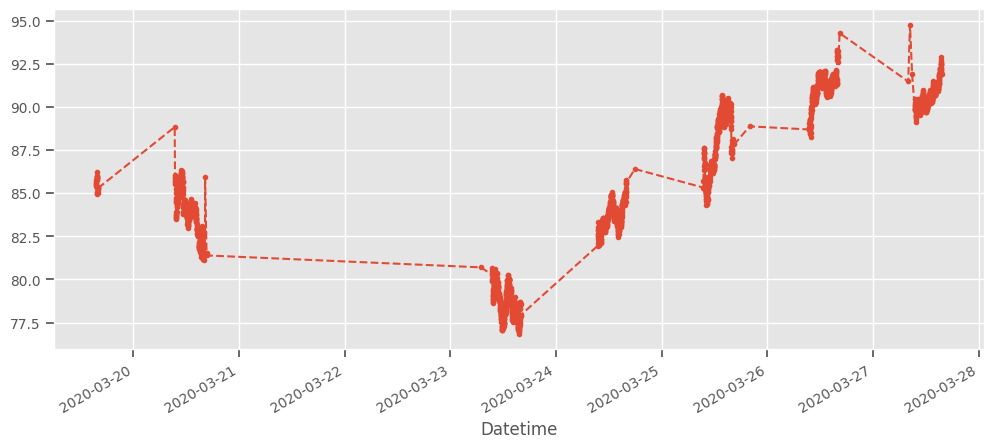

In [66]:
eda_ts.plot(style='.--');

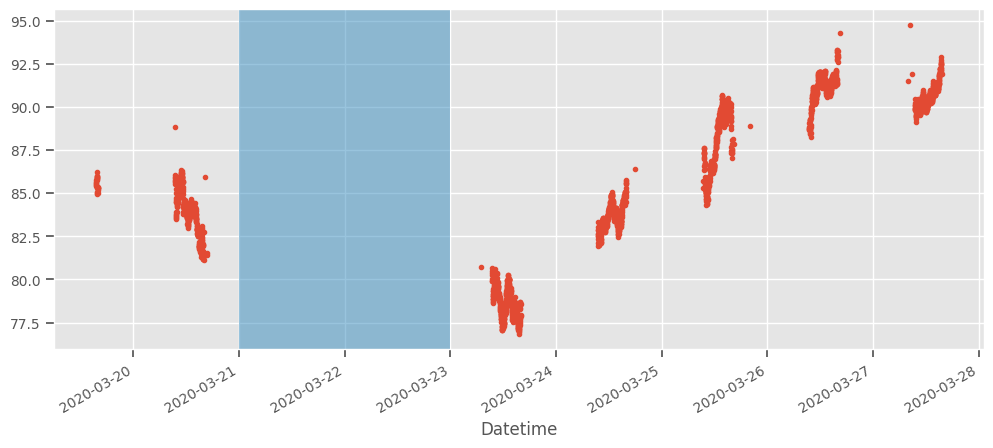

In [67]:
ax = eda_ts.plot(style='.');
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)

> Why does it look the way it does?? Are there null values?

In [68]:
## There are no null values in the ts var...
eda_ts.isna().sum()

0

> What day of the week were the days missing data?

In [69]:
## what day of the week were the days missing data?
pd.to_datetime('2020-03-21').day_name()

'Saturday'

In [70]:
pd.to_datetime('2020-03-22').day_name()

'Sunday'

In [71]:
# what is our datetime index's frequency?
eda_ts.index

DatetimeIndex(['2020-03-19 15:35:00', '2020-03-19 15:36:00',
               '2020-03-19 15:37:00', '2020-03-19 15:38:00',
               '2020-03-19 15:39:00', '2020-03-19 15:40:00',
               '2020-03-19 15:41:00', '2020-03-19 15:42:00',
               '2020-03-19 15:43:00', '2020-03-19 15:44:00',
               ...
               '2020-03-27 15:26:00', '2020-03-27 15:27:00',
               '2020-03-27 15:28:00', '2020-03-27 15:29:00',
               '2020-03-27 15:30:00', '2020-03-27 15:31:00',
               '2020-03-27 15:32:00', '2020-03-27 15:33:00',
               '2020-03-27 15:34:00', '2020-03-27 15:35:00'],
              dtype='datetime64[ns]', name='Datetime', length=2360, freq=None)

In [72]:
ts_min = eda_ts.resample("Min").asfreq()
ts_min

Datetime
2020-03-19 15:35:00   85.77
2020-03-19 15:36:00   85.48
2020-03-19 15:37:00   85.63
2020-03-19 15:38:00   85.44
2020-03-19 15:39:00   85.55
                       ... 
2020-03-27 15:31:00   92.45
2020-03-27 15:32:00   92.26
2020-03-27 15:33:00   91.97
2020-03-27 15:34:00   92.03
2020-03-27 15:35:00   91.89
Freq: T, Name: AskClose, Length: 11521, dtype: float64

In [73]:
ts_min.index

DatetimeIndex(['2020-03-19 15:35:00', '2020-03-19 15:36:00',
               '2020-03-19 15:37:00', '2020-03-19 15:38:00',
               '2020-03-19 15:39:00', '2020-03-19 15:40:00',
               '2020-03-19 15:41:00', '2020-03-19 15:42:00',
               '2020-03-19 15:43:00', '2020-03-19 15:44:00',
               ...
               '2020-03-27 15:26:00', '2020-03-27 15:27:00',
               '2020-03-27 15:28:00', '2020-03-27 15:29:00',
               '2020-03-27 15:30:00', '2020-03-27 15:31:00',
               '2020-03-27 15:32:00', '2020-03-27 15:33:00',
               '2020-03-27 15:34:00', '2020-03-27 15:35:00'],
              dtype='datetime64[ns]', name='Datetime', length=11521, freq='T')

In [74]:
ts_min.isna().sum()

9161

<Axes: xlabel='Datetime'>

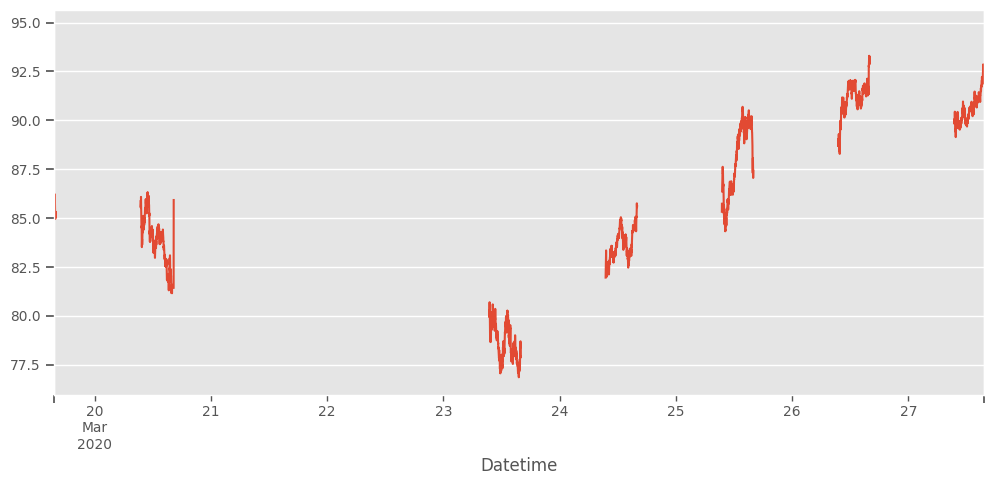

In [75]:
ts_min.plot()

## Imputing Null Values (time series)

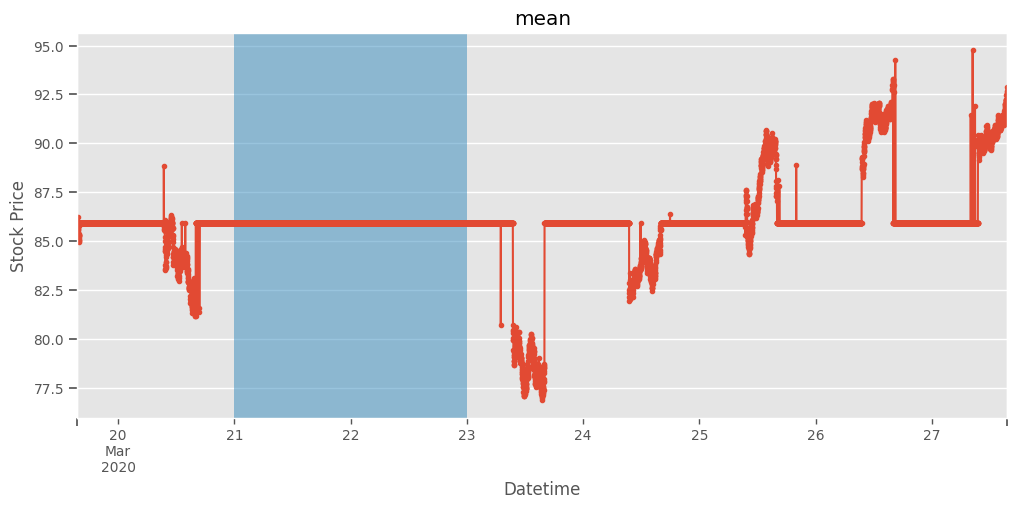

In [76]:

ax = ts_min.fillna(ts_min.mean()).plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title="mean", ylabel="Stock Price");

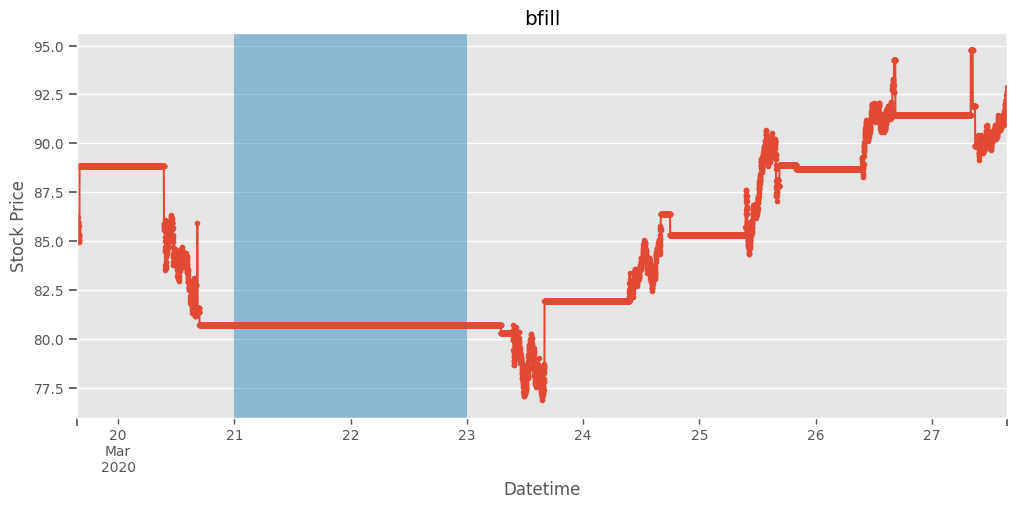

In [77]:
ax = ts_min.fillna(method='bfill').plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='bfill', ylabel="Stock Price");

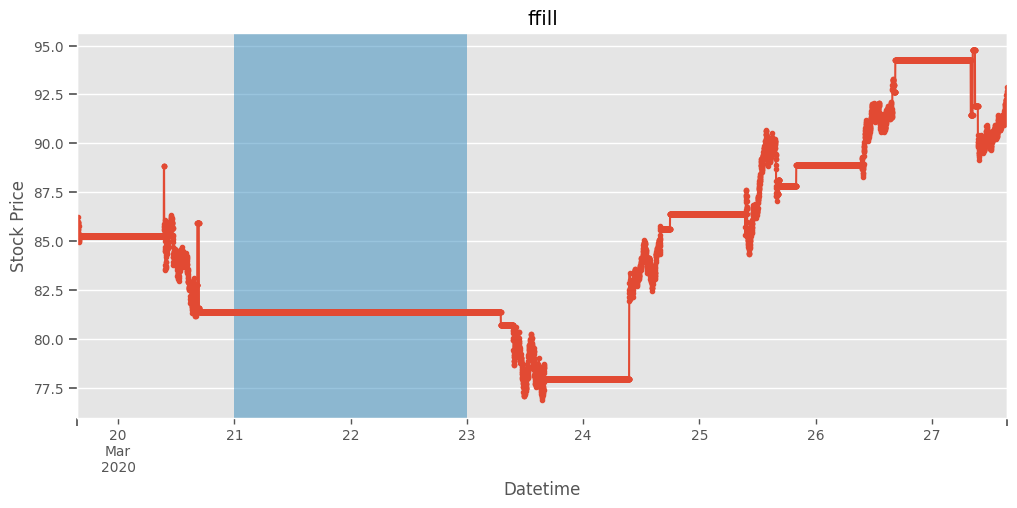

In [78]:
ax = ts_min.fillna(method='ffill').plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='ffill', ylabel="Stock Price");

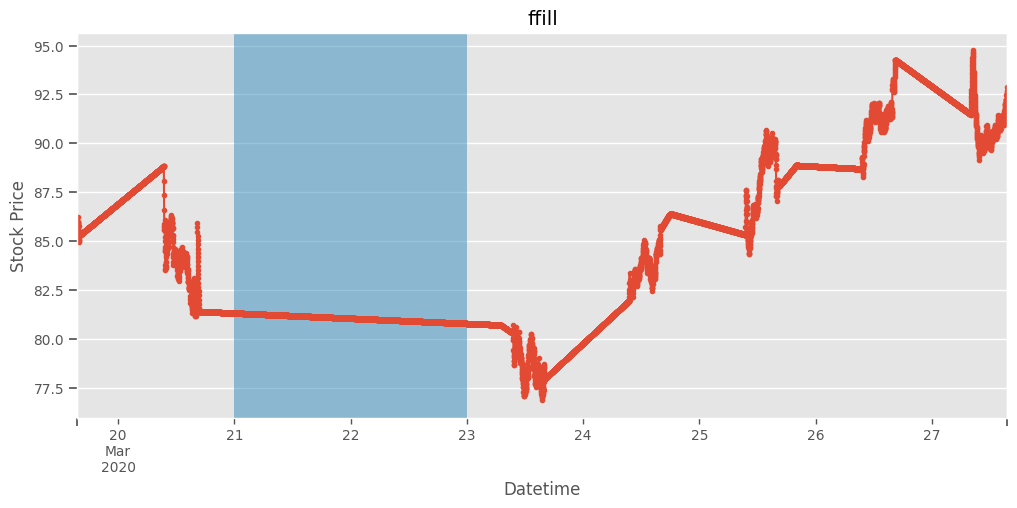

In [79]:
ts_temp = ts_min.interpolate()
ax = ts_temp.fillna(method='ffill').plot(style='.-')
ax.axvspan('2020-03-21','2020-03-23',alpha=0.5)
ax.set(title='ffill', ylabel="Stock Price");

# Working with Wide-Form Time Series Data

In [80]:
crypto = pd.read_csv("Data/stocks/wide-form-crypto.csv")
crypto

,CryptoCurrency,Symbol,Currency,2014-09-17,2014-09-18,2014-09-19,2014-09-20,2014-09-21,2014-09-22,2014-09-23,...,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-21,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26
0,Bitcoin,BTC-USD,BTC,457.33,424.44,394.80,408.90,398.82,402.15,435.79,...,"21,161.52","20,688.78","21,086.79","22,676.55","22,777.62","22,720.42","22,934.43","22,636.47","23,117.86","23,032.78"
1,Etherium,ETH-USD,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,567.85","1,515.51","1,552.56","1,659.75","1,627.12","1,628.38","1,628.25","1,556.60","1,611.71","1,603.11"
2,Dogecoin,DOGE-USD,DOGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,0.08,0.08,0.09,0.08,0.09,0.09,0.08,0.09,0.09


In [81]:
## First 3 columns are id coluimns
id_vars = crypto.columns[:3]
id_vars

Index(['CryptoCurrency', 'Symbol', 'Currency'], dtype='object')

In [82]:
## Melt the crypto data 
long_crypto = pd.melt(crypto, id_vars=id_vars)
long_crypto

,CryptoCurrency,Symbol,Currency,variable,value
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


In [83]:
id_vars = crypto.columns[:3]
id_vars

Index(['CryptoCurrency', 'Symbol', 'Currency'], dtype='object')

In [84]:
long_crypto = pd.melt(crypto, id_vars = id_vars, value_name = 'Value', var_name = 'Date')
long_crypto

,CryptoCurrency,Symbol,Currency,Date,Value
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


In [85]:
## Set the var_name  as "Date" and the value_name was "Currency Value"
long_crypto = pd.melt(crypto,id_vars=id_vars, var_name='Date', 
                      value_name="Value")
long_crypto

,CryptoCurrency,Symbol,Currency,Date,Value
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


In [86]:
## Now make Date column datetime 
long_crypto['Date'] = pd.to_datetime( long_crypto["Date"], 
                                    format='%Y-%m-%d')
long_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CryptoCurrency  9162 non-null   object        
 1   Symbol          9162 non-null   object        
 2   Currency        9162 non-null   object        
 3   Date            9162 non-null   datetime64[ns]
 4   Value           6864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 358.0+ KB


In [87]:
## Set Date as index
long_crypto = long_crypto.set_index('Date')
long_crypto

,CryptoCurrency,Symbol,Currency,Value
Date,,,,
2014-09-17,Bitcoin,BTC-USD,BTC,457.33
2014-09-17,Etherium,ETH-USD,ETH,NaN
2014-09-17,Dogecoin,DOGE-USD,DOGE,NaN
2014-09-18,Bitcoin,BTC-USD,BTC,424.44
2014-09-18,Etherium,ETH-USD,ETH,NaN
...,...,...,...,...
2023-01-25,Etherium,ETH-USD,ETH,"1,611.71"
2023-01-25,Dogecoin,DOGE-USD,DOGE,0.09
2023-01-26,Bitcoin,BTC-USD,BTC,"23,032.78"


In [88]:
## 
long_crypto.index

DatetimeIndex(['2014-09-17', '2014-09-17', '2014-09-17', '2014-09-18',
               '2014-09-18', '2014-09-18', '2014-09-19', '2014-09-19',
               '2014-09-19', '2014-09-20',
               ...
               '2023-01-23', '2023-01-24', '2023-01-24', '2023-01-24',
               '2023-01-25', '2023-01-25', '2023-01-25', '2023-01-26',
               '2023-01-26', '2023-01-26'],
              dtype='datetime64[ns]', name='Date', length=9162, freq=None)

In [89]:
long_crypto.groupby('CryptoCurrency').resample("D").asfreq()

CryptoCurrency   Symbol Currency    Value
CryptoCurrency Date                                                
Bitcoin        2014-09-17        Bitcoin  BTC-USD      BTC   457.33
               2014-09-18        Bitcoin  BTC-USD      BTC   424.44
               2014-09-19        Bitcoin  BTC-USD      BTC   394.80
               2014-09-20        Bitcoin  BTC-USD      BTC   408.90
               2014-09-21        Bitcoin  BTC-USD      BTC   398.82
...                                  ...      ...      ...      ...
Etherium       2023-01-22       Etherium  ETH-USD      ETH 1,628.38
               2023-01-23       Etherium  ETH-USD      ETH 1,628.25
               2023-01-24       Etherium  ETH-USD      ETH 1,556.60
               2023-01-25       Etherium  ETH-USD      ETH 1,611.71
               2023-01-26       Etherium  ETH-USD      ETH 1,603.11

[9162 rows x 4 columns]

In [90]:
crypto_ts = long_crypto.groupby('CryptoCurrency').resample("D").asfreq()['Value']
crypto_ts

CryptoCurrency  Date      
Bitcoin         2014-09-17     457.33
                2014-09-18     424.44
                2014-09-19     394.80
                2014-09-20     408.90
                2014-09-21     398.82
                               ...   
Etherium        2023-01-22   1,628.38
                2023-01-23   1,628.25
                2023-01-24   1,556.60
                2023-01-25   1,611.71
                2023-01-26   1,603.11
Name: Value, Length: 9162, dtype: float64

In [91]:
type(crypto_ts)

pandas.core.series.Series

In [92]:
crypto_ts.index

MultiIndex([( 'Bitcoin', '2014-09-17'),
            ( 'Bitcoin', '2014-09-18'),
            ( 'Bitcoin', '2014-09-19'),
            ( 'Bitcoin', '2014-09-20'),
            ( 'Bitcoin', '2014-09-21'),
            ( 'Bitcoin', '2014-09-22'),
            ( 'Bitcoin', '2014-09-23'),
            ( 'Bitcoin', '2014-09-24'),
            ( 'Bitcoin', '2014-09-25'),
            ( 'Bitcoin', '2014-09-26'),
            ...
            ('Etherium', '2023-01-17'),
            ('Etherium', '2023-01-18'),
            ('Etherium', '2023-01-19'),
            ('Etherium', '2023-01-20'),
            ('Etherium', '2023-01-21'),
            ('Etherium', '2023-01-22'),
            ('Etherium', '2023-01-23'),
            ('Etherium', '2023-01-24'),
            ('Etherium', '2023-01-25'),
            ('Etherium', '2023-01-26')],
           names=['CryptoCurrency', 'Date'], length=9162)

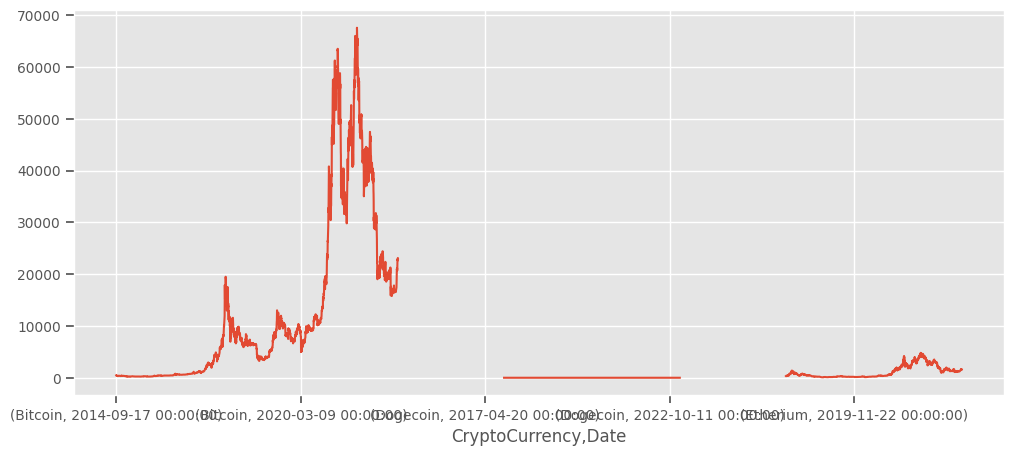

In [93]:
crypto_ts.plot();

> What are we seeing?

In [94]:
crypto_ts

CryptoCurrency  Date      
Bitcoin         2014-09-17     457.33
                2014-09-18     424.44
                2014-09-19     394.80
                2014-09-20     408.90
                2014-09-21     398.82
                               ...   
Etherium        2023-01-22   1,628.38
                2023-01-23   1,628.25
                2023-01-24   1,556.60
                2023-01-25   1,611.71
                2023-01-26   1,603.11
Name: Value, Length: 9162, dtype: float64

In [95]:
crypto_ts.unstack(0)

CryptoCurrency,Bitcoin,Dogecoin,Etherium
Date,,,
2014-09-17,457.33,NaN,NaN
2014-09-18,424.44,NaN,NaN
2014-09-19,394.80,NaN,NaN
2014-09-20,408.90,NaN,NaN
2014-09-21,398.82,NaN,NaN
...,...,...,...
2023-01-22,"22,720.42",0.09,"1,628.38"
2023-01-23,"22,934.43",0.09,"1,628.25"
2023-01-24,"22,636.47",0.08,"1,556.60"


In [96]:
crypto_unstacked = crypto_ts.unstack(0)
crypto_unstacked

CryptoCurrency,Bitcoin,Dogecoin,Etherium
Date,,,
2014-09-17,457.33,NaN,NaN
2014-09-18,424.44,NaN,NaN
2014-09-19,394.80,NaN,NaN
2014-09-20,408.90,NaN,NaN
2014-09-21,398.82,NaN,NaN
...,...,...,...
2023-01-22,"22,720.42",0.09,"1,628.38"
2023-01-23,"22,934.43",0.09,"1,628.25"
2023-01-24,"22,636.47",0.08,"1,556.60"


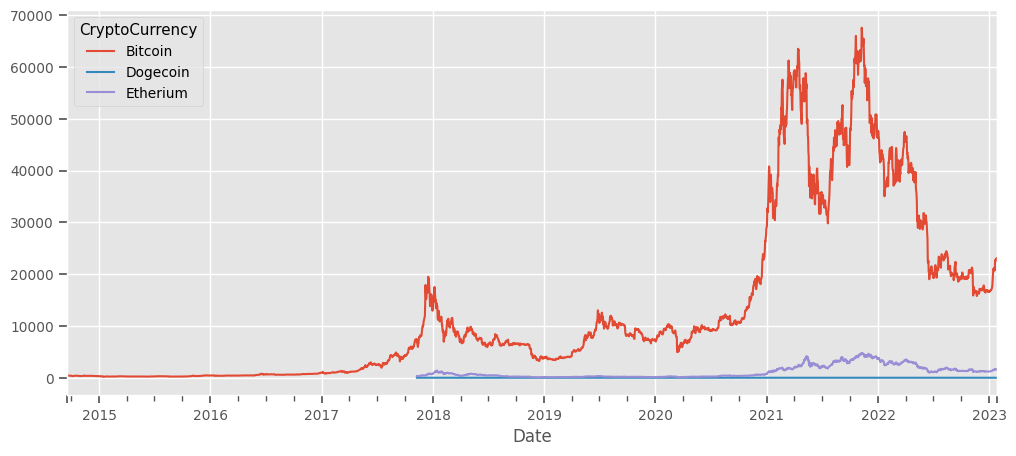

In [97]:
crypto_unstacked.plot();

## Selecting our TS for Resampling Demonstration

In [99]:
ts = crypto_unstacked['Bitcoin'].loc['2021':'2022'].copy()
ts

Date
2021-01-01   29,374.15
2021-01-02   32,127.27
2021-01-03   32,782.02
2021-01-04   31,971.91
2021-01-05   33,992.43
                ...   
2022-12-27   16,717.17
2022-12-28   16,552.57
2022-12-29   16,642.34
2022-12-30   16,602.59
2022-12-31   16,547.50
Freq: D, Name: Bitcoin, Length: 730, dtype: float64

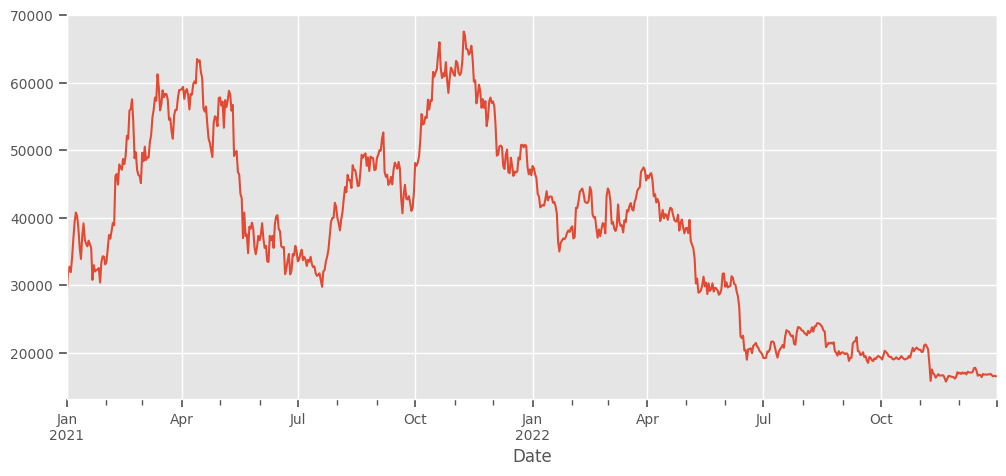

In [100]:
ts.plot();

## Resampling

In [101]:
## Check the index to confirm the current freq
ts.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=730, freq='D')

>It looks like we have minute-resolution data (frequency = minutes).

### Resample as Weeks Frequency

- We need to look up the correct frequency code for minutes: https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects 
    

In [102]:
## Resample using correct freq code and use .asfreq as agg emthod
ts_W = ts.resample("W").last()
ts_W

Date
2021-01-03   32,782.02
2021-01-10   38,356.44
2021-01-17   35,791.28
2021-01-24   32,289.38
2021-01-31   33,114.36
                ...   
2022-12-04   17,130.49
2022-12-11   17,104.19
2022-12-18   16,757.98
2022-12-25   16,841.99
2023-01-01   16,547.50
Freq: W-SUN, Name: Bitcoin, Length: 105, dtype: float64

In [103]:
ts_W.index

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07',
               ...
               '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20',
               '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18',
               '2022-12-25', '2023-01-01'],
              dtype='datetime64[ns]', name='Date', length=105, freq='W-SUN')

<Axes: xlabel='Date'>

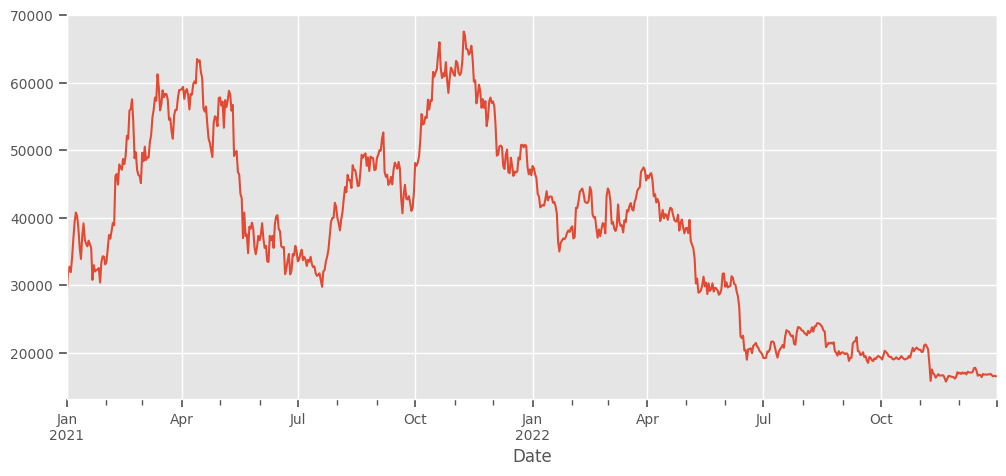

In [104]:
ts.plot()

- Let's resample our ts as daily, weekly, and monthly to compare.

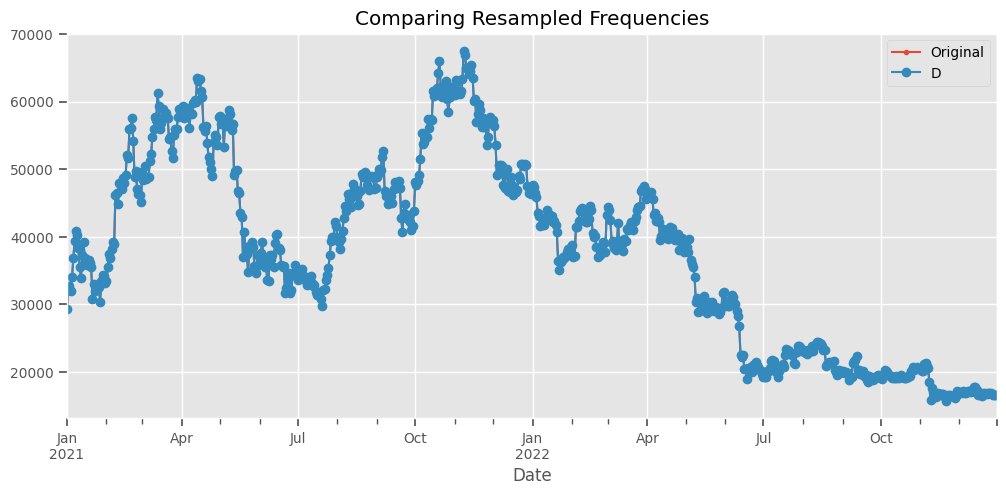

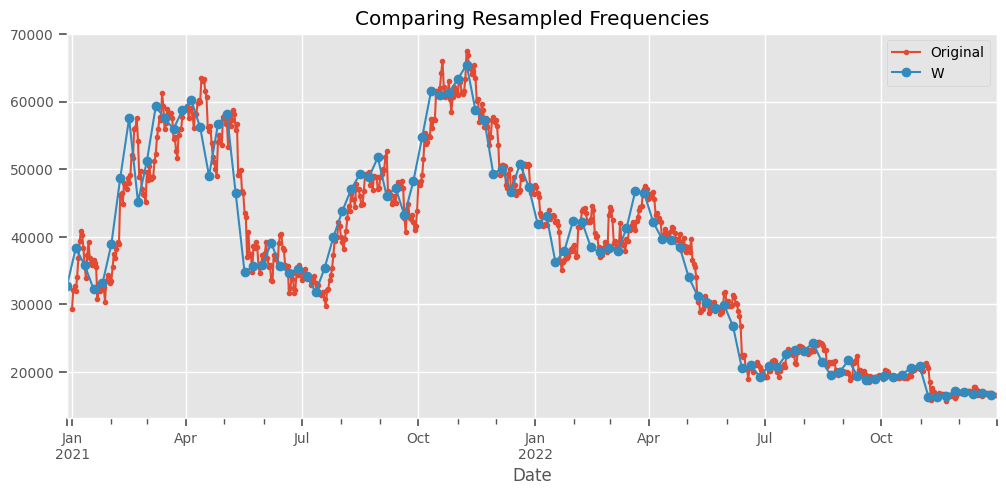

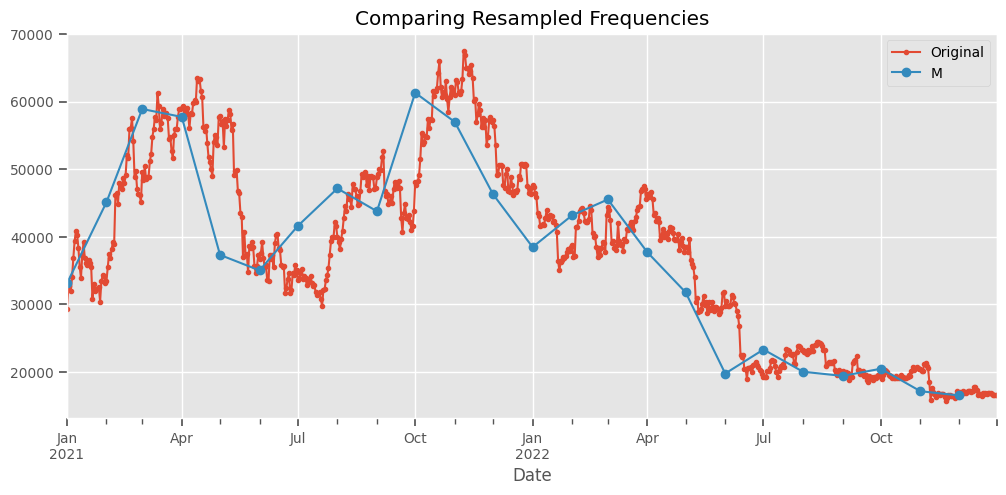

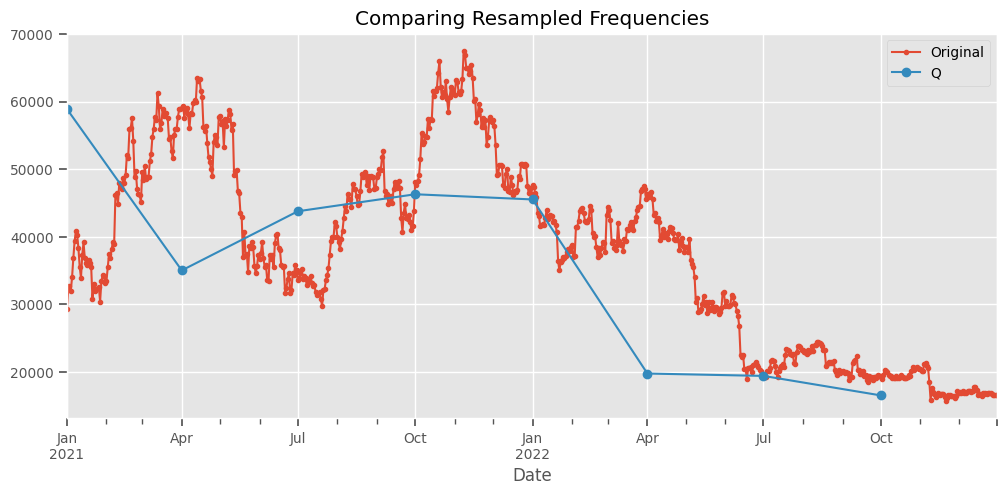

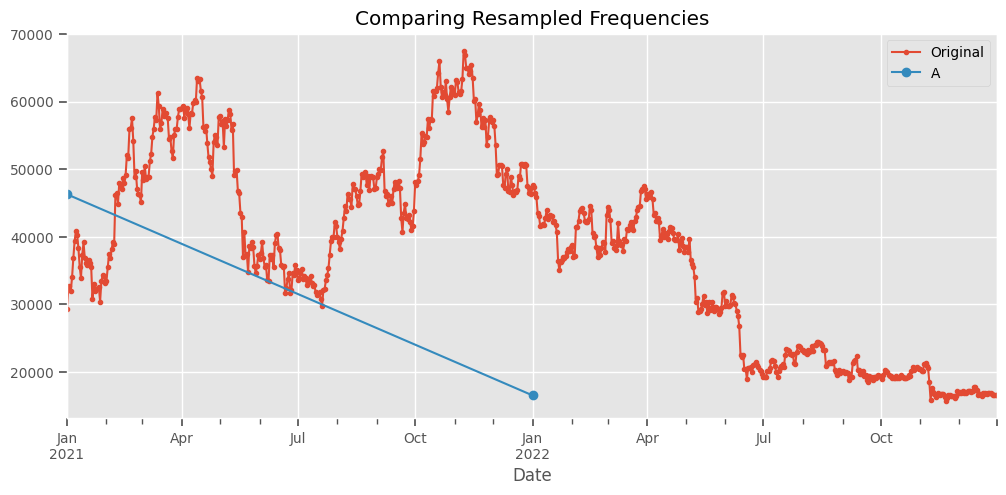

In [105]:
freqs = ['D','W','M','Q','A']


for freq in freqs:
    ax = ts.plot(label='Original',  style='.-',
            title='Comparing Resampled Frequencies');

    ts_temp = ts.resample(freq).last()
    ts_temp.plot(style='o-', label=freq,ax=ax)
    plt.legend()
    plt.show()